In [1]:
#Import libraries that we shall need

import pandas as pd                 #for data manipulation and analysis  
import numpy as np                  #for Numerical calculations
import matplotlib.pyplot as plt     #data visualization library 
import seaborn as sns               #creating statistical graphics

In [2]:
#read the dataset content

df = pd.read_csv("files/ecommerce.csv")

In [3]:
#Understanding structure and content
#View your dataset properties
df

,CustomerID,Gender,Region,Age,ProductName,Category,UnitPrice,Quantity,TotalPrice,ShippingFee,ShippingStatus,OrderDate
0,CUST0046,Male,West,22,Headphones,Accessories,100,2,200,7,In Transit,09/04/2023
1,CUST0169,Female,South,54,Monitor,Electronics,300,1,300,11,Returned,28/08/2023
2,CUST0002,Male,North,23,Headphones,Accessories,100,5,500,12,Delivered,18/01/2023
3,CUST0147,Male,North,64,Smartwatch,Wearables,200,2,400,11,In Transit,11/01/2023
4,CUST0262,Male,East,27,Smartwatch,Wearables,200,1,200,18,In Transit,23/10/2023
...,...,...,...,...,...,...,...,...,...,...,...,...
805,CUST0200,Female,North,68,Smartphone,Electronics,800,4,3200,17,Returned,05/08/2023
806,CUST0079,Male,West,26,Smartwatch,Wearables,200,2,400,7,Returned,04/01/2023
807,CUST0201,Female,South,49,Headphones,Accessories,100,1,100,17,In Transit,05/01/2023
808,CUST0133,Male,East,47,Laptop,Electronics,1500,1,1500,19,Delivered,01/04/2023


In [4]:
#Check number of rows and columns in the dataset
df.shape

(810, 12)

In [23]:
# Check for any missing values in the dataset

print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
CustomerID        0
Gender            0
Region            0
Age               0
ProductName       0
Category          0
UnitPrice         0
Quantity          0
TotalPrice        0
ShippingFee       0
ShippingStatus    0
OrderDate         0
dtype: int64


In [24]:
# Remove duplicate rows 

initial_count = df.shape[0]
df_cleaned = df.drop_duplicates()
after_count = df_cleaned.shape[0]

# Calculate the number of removed records
removed_records = initial_count - after_count

print(f'Total records before: {initial_count}')
print(f'Total records after: {after_count}')
print(f'Duplicates removed: {removed_records}')

# Save the cleaned dataset incase there are some records removed using this  df_cleaned.to_csv('cleaned_dataset.csv', index=False)


Total records before: 810
Total records after: 810
Duplicates removed: 0


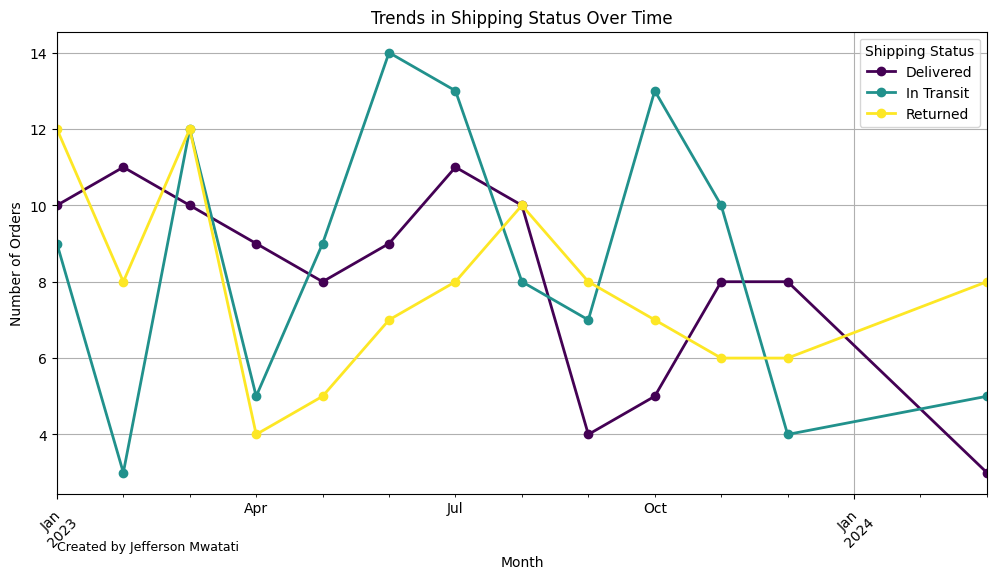

In [28]:

# Convert to datetime first
df["OrderDate"] = pd.to_datetime(df["OrderDate"], errors="coerce")

# Drop rows with missing OrderDate if necessary
#df = df.dropna(subset=["OrderDate"])

# Extract year-month
df["order_month"] = df["OrderDate"].dt.to_period("M")

# Group by month and shipping status (check actual column name spelling and casing)
shipping_trends = df.groupby(["order_month", "ShippingStatus"]).size().unstack(fill_value=0)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
shipping_trends.plot(kind="line", marker="o", colormap="viridis", linewidth=2, ax=ax)

ax.set_title("Trends in Shipping Status Over Time")
ax.set_xlabel("Month")
ax.set_ylabel("Number of Orders")
ax.legend(title="Shipping Status")
ax.grid(True)
plt.xticks(rotation=45)
plt.text(0, -0.1, "Created by Jefferson Mwatati", transform=ax.transAxes, fontsize=9, verticalalignment="top")

plt.show()


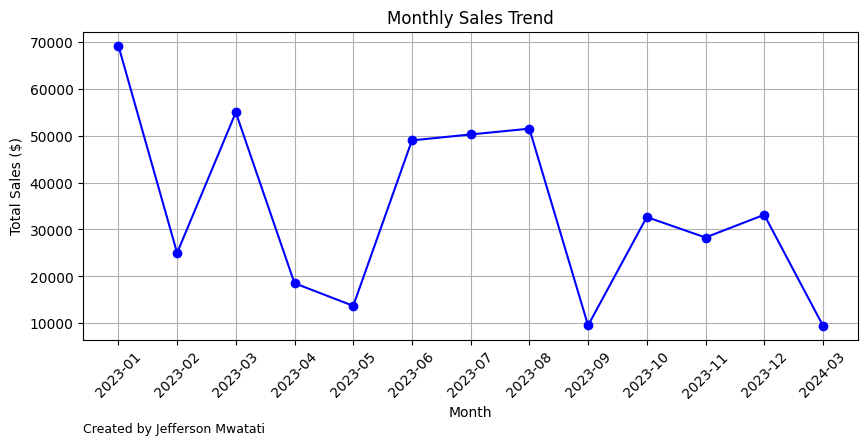

In [48]:
# Convert to datetime first
df["OrderDate"] = pd.to_datetime(df["OrderDate"], errors="coerce")

# Extract year-month from orderdate
df["order_month"] = df["OrderDate"].dt.to_period("M")

# Aggregate total sales per month
monthly_sales = df.groupby("order_month")["TotalPrice"].sum().reset_index()

# Convert order_month to string for plotting
monthly_sales["order_month"] = monthly_sales["order_month"].astype(str)

# Plot the sales trend
plt.figure(figsize=(10, 4))
plt.plot(monthly_sales["order_month"], monthly_sales["TotalPrice"], marker="o", linestyle="-", color="b")

plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.grid(True)
plt.xticks(rotation=45)

# Add "Created by" text close to the graph on the left side
plt.text(0, -0.3, "Created by Jefferson Mwatati", transform=plt.gca().transAxes, fontsize=9, color="black")

plt.show()


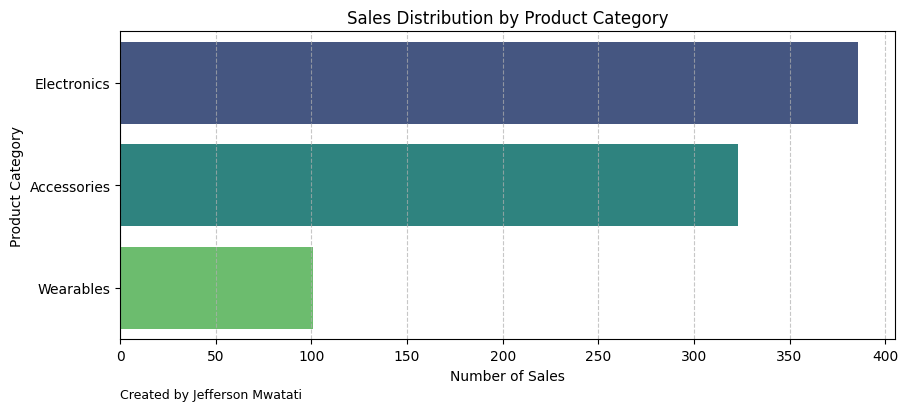

In [50]:
# Aggregate the number of sales per category
category_sales = df["Category"].value_counts().reset_index()
category_sales.columns = ["Category", "number_of_sales"]

# Plot sales distribution
plt.figure(figsize=(10, 4))
ax = sns.barplot(
    x="number_of_sales",
    y="Category",
    data=category_sales,
    hue="Category",  # Assign hue explicitly
    palette="viridis",
    legend=False  # Disable legend
)

plt.title("Sales Distribution by Product Category")
plt.xlabel("Number of Sales")
plt.ylabel("Product Category")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Add "Created by" text near the graph, at the bottom left
plt.text(x=0, y=-0.2, s="Created by Jefferson Mwatati", fontsize=9, ha="left", va="bottom", transform=ax.transAxes)

plt.show()


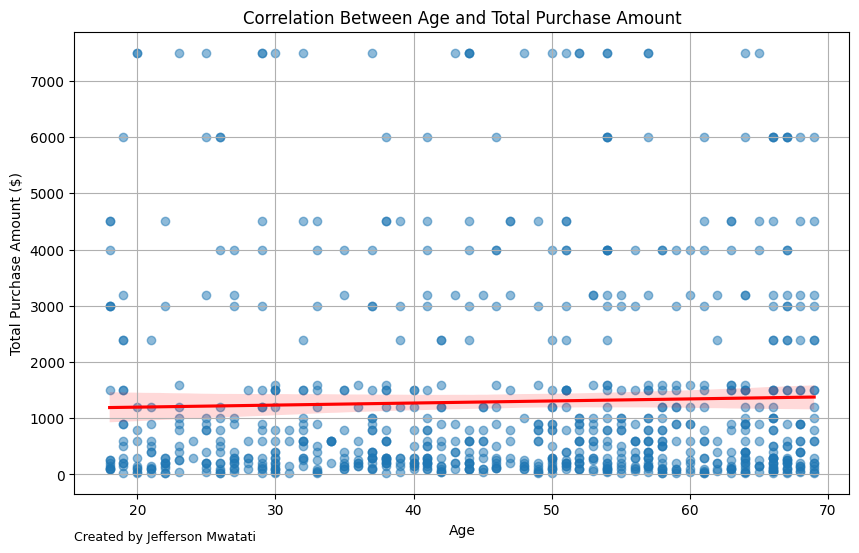

In [5]:
# Plot scatter plot with regression line
plt.figure(figsize=(10, 6))
ax = sns.regplot(
    x="Age", 
    y="TotalPrice", 
    data=df, 
    scatter_kws={"alpha": 0.5}, 
    line_kws={"color": "red"}
)

plt.title("Correlation Between Age and Total Purchase Amount")
plt.xlabel("Age")
plt.ylabel("Total Purchase Amount ($)")
plt.grid(True)

# Add "Created by" text near the graph, at the bottom left
plt.figtext(0, -0.1, "Created by Jefferson Mwatati", fontsize=9, color="black", ha="left", transform=ax.transAxes)

plt.show()

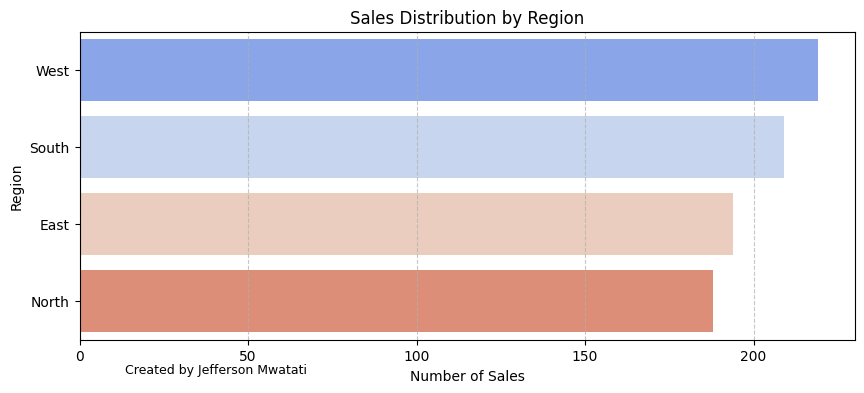

In [49]:
# Count the number of sales per region
region_sales = df["Region"].value_counts().reset_index()
region_sales.columns = ["Region", "number_of_sales"]

# Plot sales distribution by region
plt.figure(figsize=(10, 4))
sns.barplot(
    x="number_of_sales",
    y="Region",
    data=region_sales,
    hue=region_sales["Region"],  # Assign hue to fix warning
    palette="coolwarm",
    legend=False  # Disable legend
)

plt.title("Sales Distribution by Region")
plt.xlabel("Number of Sales")
plt.ylabel("Region")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.figtext(0, -0.1, "Created by Jefferson Mwatati", fontsize=9, color="black", ha="left", transform=ax.transAxes)

plt.show()


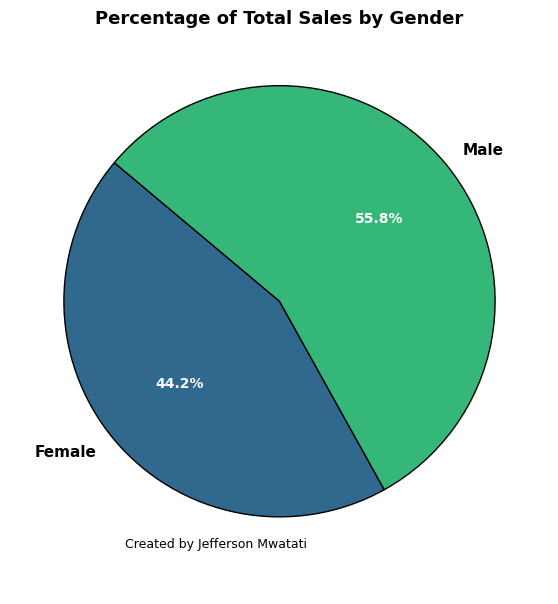

In [44]:
# Group by gender and sum the total sales
gender_sales = df.groupby("Gender")["TotalPrice"].sum()

# Define colors for better visualization
colors = sns.color_palette("viridis", len(gender_sales))

# Create the pie chart with enhanced appearance
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    gender_sales, 
    labels=gender_sales.index, 
    autopct="%1.1f%%", 
    colors=colors, 
    startangle=140, 
    wedgeprops={"edgecolor": "black", "linewidth": 1, "antialiased": True},
    textprops={"fontsize": 10, "color": "white", "weight": "bold"}
)

# Improve label visibility
for text in texts:
    text.set_color("black")
    text.set_fontsize(11)

plt.title("Percentage of Total Sales by Gender", fontsize=13, fontweight="bold", color="black")

# Add "Created by" text near the graph at the bottom left
plt.figtext(0, -0.02, "Created by Jefferson Mwatati", fontsize=9, color="black", ha="left", transform=ax.transAxes)

plt.show()


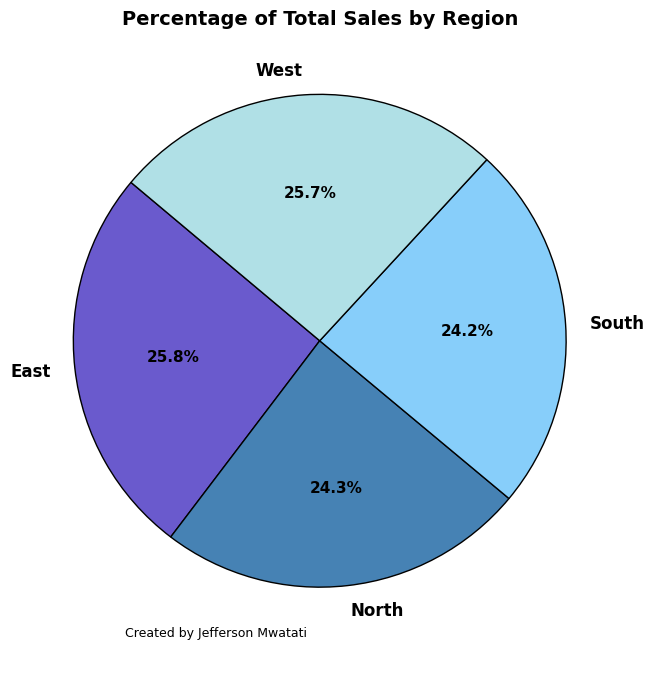

In [40]:
# Group by region and sum the total sales
region_sales = df.groupby("Region")["TotalPrice"].sum()

# Define visually appealing colors (soft blues and purples)
colors = ["#6a5acd", "#4682b4", "#87cefa", "#b0e0e6", "#dda0dd", "#ffb6c1"]

# Create the pie chart with enhanced appearance
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    region_sales, 
    labels=region_sales.index, 
    autopct="%1.1f%%", 
    colors=colors[:len(region_sales)],  # Use only required colors
    startangle=140, 
    wedgeprops={"edgecolor": "black", "linewidth": 1, "antialiased": True},
    textprops={"fontsize": 11, "color": "black", "weight": "bold"}
)

# Improve label visibility
for text in texts:
    text.set_color("black")
    text.set_fontsize(12)

plt.title("Percentage of Total Sales by Region", fontsize=14, fontweight="bold", color="black")

# Add "Created by" text at the bottom left, close to the graph
plt.figtext(0, -0.02, "Created by Jefferson Mwatati", fontsize=9, color="black", ha="left", transform=ax.transAxes)

plt.show()



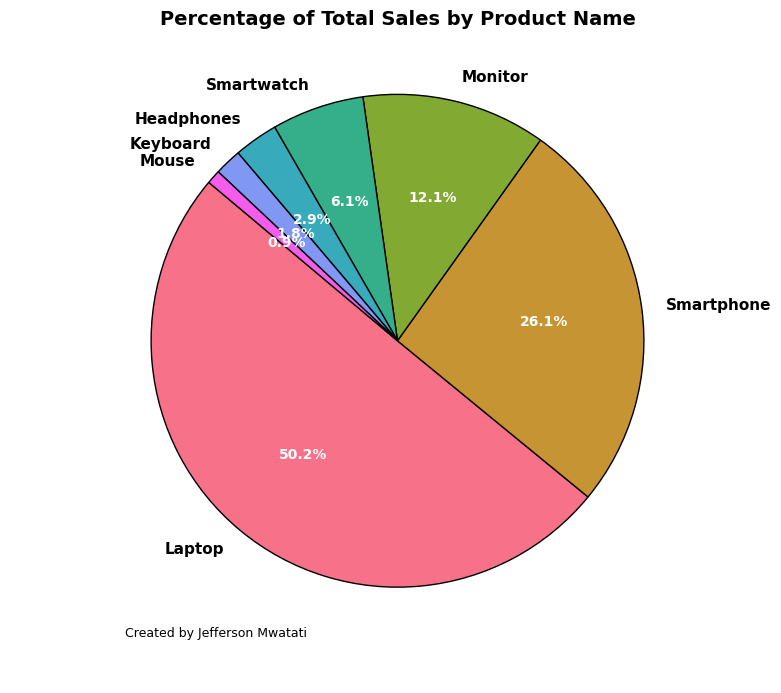

In [46]:
# Group by product name and sum total sales
product_sales = df.groupby("ProductName")["TotalPrice"].sum().sort_values(ascending=False)

# Select the top 15 products for better visibility, grouping the rest as "Other"
top_n = 15
if len(product_sales) > top_n:
    other_sales = product_sales[top_n:].sum()
    product_sales = product_sales[:top_n]
    product_sales["Other"] = other_sales  # Group remaining products under 'Other'

# Define a vibrant color palette
colors = sns.color_palette("husl", len(product_sales))

# Create the pie chart with improved appearance
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    product_sales, 
    labels=product_sales.index, 
    autopct="%1.1f%%", 
    colors=colors, 
    startangle=140, 
    wedgeprops={"edgecolor": "black", "linewidth": 1, "antialiased": True},
    textprops={"fontsize": 10, "color": "black", "weight": "bold"}
)

# Adjust text labels for better visibility
for text in texts:
    text.set_color("black")
    text.set_fontsize(11)
    text.set_weight("bold")

for autotext in autotexts:
    autotext.set_color("white")  # White text inside wedges for contrast
    autotext.set_fontsize(10)

plt.title("Percentage of Total Sales by Product Name", fontsize=14, fontweight="bold", color="black")

# Add "Created by" text at the bottom left, close to the graph
plt.figtext(0, -0.02, "Created by Jefferson Mwatati", fontsize=9, color="black", ha="left", transform=ax.transAxes)

plt.show()


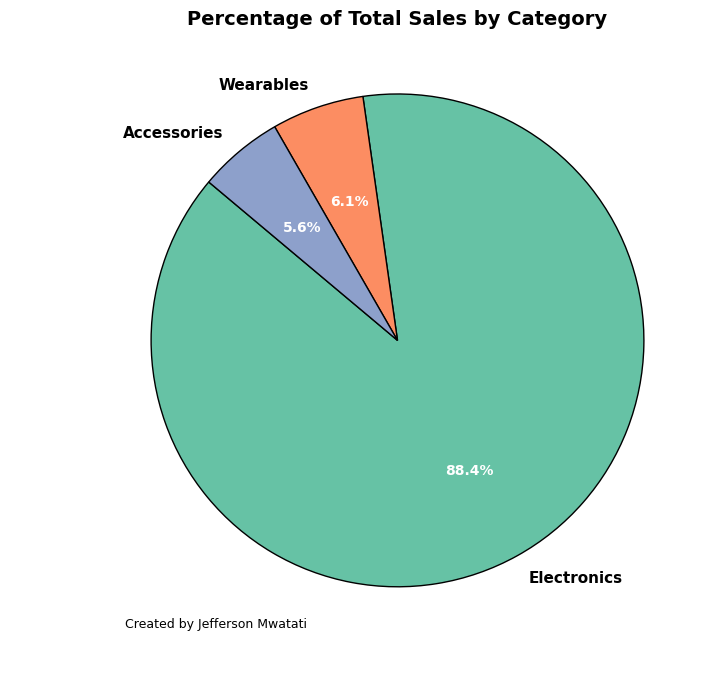

In [45]:
# Group by category and sum total sales
category_sales = df.groupby("Category")["TotalPrice"].sum().sort_values(ascending=False)

# Define a visually appealing color palette
colors = sns.color_palette("Set2", len(category_sales))

# Create the pie chart with enhanced appearance
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    category_sales, 
    labels=category_sales.index, 
    autopct="%1.1f%%", 
    colors=colors, 
    startangle=140, 
    wedgeprops={"edgecolor": "black", "linewidth": 1, "antialiased": True},
    textprops={"fontsize": 10, "color": "black", "weight": "bold"}
)

# Improve label visibility
for text in texts:
    text.set_color("black")
    text.set_fontsize(11)
    text.set_weight("bold")

for autotext in autotexts:
    autotext.set_color("white")  # White text inside wedges for contrast
    autotext.set_fontsize(10)
    autotext.set_weight("bold")

plt.title("Percentage of Total Sales by Category", fontsize=14, fontweight="bold", color="black")

# Add "Created by" text at the bottom left, close to the graph
plt.figtext(0, -0.01, "Created by Jefferson Mwatati", fontsize=9, color="black", ha="left", transform=ax.transAxes)

plt.show()


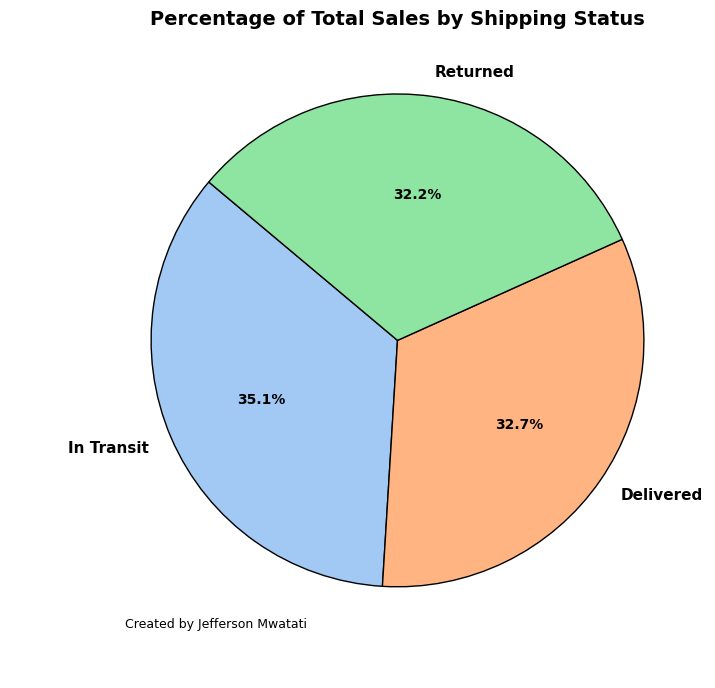

In [47]:
# Group by shipping status and sum total sales
shipping_sales = df.groupby("ShippingStatus")["TotalPrice"].sum().sort_values(ascending=False)

# Define a visually appealing color palette
colors = sns.color_palette("pastel", len(shipping_sales))

# Create the pie chart with improved aesthetics
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    shipping_sales, 
    labels=shipping_sales.index, 
    autopct="%1.1f%%", 
    colors=colors, 
    startangle=140, 
    wedgeprops={"edgecolor": "black", "linewidth": 1, "antialiased": True},
    textprops={"fontsize": 10, "color": "black", "weight": "bold"}
)

# Improve label visibility
for text in texts:
    text.set_color("black")
    text.set_fontsize(11)
    text.set_weight("bold")

for autotext in autotexts:
    autotext.set_color("black")  # Ensure contrast inside wedges
    autotext.set_fontsize(10)
    autotext.set_weight("bold")

plt.title("Percentage of Total Sales by Shipping Status", fontsize=14, fontweight="bold", color="black")

# Add "Created by" text at the bottom left, close to the graph
plt.figtext(0, -0.01, "Created by Jefferson Mwatati", fontsize=9, color="black", ha="left", transform=ax.transAxes)

plt.show()
